In [12]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import pandas as pd
import numpy as np
import geopandas as gpd 
from shapely.geometry import Point
import matplotlib.pyplot as plt 
import os 
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
import urllib.request
warnings.filterwarnings('ignore')
%matplotlib inline

In [166]:
complaints = pd.read_csv("complaints.csv")

In [167]:
complaints.rename(columns={'Created Date':'CrDate'}, inplace=True)
complaints.rename(columns={'Closed Date':'ClDate'}, inplace=True)

In [168]:
complaints

,Unique Key,CrDate,ClDate,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location
0,24770565,1/11/2013 17:04,1/14/2013 0:00,DOB,Department of Buildings,Building/Use,No Certificate Of Occupancy/Illegal/Contrary T...,NaN,11216.0,227A MONROE STREET,...,1/14/2013 0:00,03 BROOKLYN,3.018130e+09,BROOKLYN,"998,295","189,069",BROOKLYN,40.685616,-73.949358,"(40.68561635625993, -73.94935830467688)"
1,24208344,10/15/2012 10:22,9/19/2013 0:00,DOB,Department of Buildings,Boilers,Boiler - Defective/Inoperative/No Permit,NaN,11212.0,234 EAST 93 STREET,...,9/19/2013 0:00,17 BROOKLYN,3.046280e+09,BROOKLYN,"1,005,312","179,696",BROOKLYN,40.659876,-73.924087,"(40.659875668174216, -73.92408658701677)"
2,24770681,1/11/2013 1:02,1/11/2013 1:02,DOB,Department of Buildings,General Construction/Plumbing,Egress - Doors Locked/Blocked/Improper/No Seco...,NaN,10017.0,383 MADISON AVENUE,...,1/11/2013 0:00,05 MANHATTAN,1.012820e+09,MANHATTAN,"990,567","214,575",MANHATTAN,40.755633,-73.977199,"(40.75563305886006, -73.97719901528794)"
3,24770916,1/11/2013 14:21,1/14/2013 10:57,DOB,DOB Inspections - Queens,Construction,Initial - CO,Street Address,11364.0,50-10 201 STREET,...,1/14/2013 10:56,11 QUEENS,4.073770e+09,QUEENS,"1,045,757","212,725",QUEENS,40.750344,-73.778010,"(40.75034362005814, -73.7780100841424)"
4,52774941,12/10/2021 20:08,12/13/2021 0:00,DOB,Department of Buildings,Emergency Response Team (ERT),After Hours Work - Illegal,NaN,10065.0,225 EAST 63 STREET,...,12/13/2021 0:00,08 MANHATTAN,1.014180e+09,MANHATTAN,"994,214","217,537",MANHATTAN,40.763760,-73.964031,"(40.76375963167554, -73.96403091090507)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33359,26930402,12/21/2013 9:39,1/23/2014 0:00,DOB,Department of Buildings,Elevator,Elevator - Defective/Not Working,NaN,10304.0,160 PARKHILL AVENUE,...,1/23/2014 0:00,01 STATEN ISLAND,5.029220e+09,STATEN ISLAND,"961,623","163,622",STATEN ISLAND,40.615752,-74.081500,"(40.61575212737598, -74.08150021029086)"
33360,26930423,12/21/2013 12:11,1/30/2014 0:00,DOB,Department of Buildings,Building/Use,Illegal Conversion Of Residential Building/Space,NaN,11375.0,111-39 76 ROAD,...,1/30/2014 0:00,06 QUEENS,4.033400e+09,QUEENS,"1,029,784","200,397",QUEENS,40.716603,-73.835743,"(40.716603029969725, -73.83574281097168)"
33361,26930458,12/20/2013 20:23,12/23/2013 0:00,DOB,Department of Buildings,General Construction/Plumbing,"Building - Vacant, Open And Unguarded",NaN,11373.0,90-14 51 AVENUE,...,12/23/2013 0:00,04 QUEENS,4.018530e+09,QUEENS,"1,019,255","208,748",QUEENS,40.739572,-73.873681,"(40.739572389602685, -73.87368112347554)"
33362,26930484,12/20/2013 20:47,12/21/2013 0:00,DOB,Department of Buildings,Building/Use,Illegal. Commercial Use In Resident Zone,NaN,11419.0,114-12 95 AVENUE,...,12/21/2013 0:00,09 QUEENS,4.094160e+09,QUEENS,"1,031,081","191,169",QUEENS,40.691268,-73.831128,"(40.69126761593199, -73.83112826066846)"


In [169]:
complaints['CrDate'] = pd.to_datetime(complaints['CrDate'], errors = 'coerce')
complaints['ClDate'] = pd.to_datetime(complaints['ClDate'], errors = 'coerce')

In [170]:
complaints['Date'] = complaints['CrDate'].dt.date
complaints['Month'] = complaints['CrDate'].dt.month
complaints['Year'] = complaints['CrDate'].dt.year
complaints['DOW'] = complaints['CrDate'].dt.dayofweek
complaints['Hour'] = complaints['CrDate'].dt.hour
complaints['Date'] = complaints['ClDate'].dt.date
complaints['Month'] = complaints['ClDate'].dt.month
complaints['Year'] = complaints['ClDate'].dt.year
complaints['DOW'] = complaints['ClDate'].dt.dayofweek
complaints['Hour'] = complaints['ClDate'].dt.hour
complaints = complaints.loc[complaints['Year'].isin([2017,2018,2019,2020,2021])]

In [171]:
complaints

,Unique Key,CrDate,ClDate,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Date,Month,Year,DOW,Hour
4,52774941,2021-12-10 20:08:00,2021-12-13,DOB,Department of Buildings,Emergency Response Team (ERT),After Hours Work - Illegal,NaN,10065.0,225 EAST 63 STREET,...,"217,537",MANHATTAN,40.763760,-73.964031,"(40.76375963167554, -73.96403091090507)",2021-12-13,12.0,2021.0,0.0,0.0
8,52776266,2021-12-12 10:04:00,2021-12-20,DOB,Department of Buildings,General Construction/Plumbing,Building Permit - None,NaN,10469.0,2918 THROOP AVENUE,...,"255,584",BRONX,40.868097,-73.850916,"(40.86809728159516, -73.85091557701605)",2021-12-20,12.0,2021.0,0.0,0.0
37,24776822,2013-01-12 22:01:00,2018-02-05,DOB,Department of Buildings,Building/Use,Illegal. Commercial Use In Resident Zone,NaN,11419.0,103-35 135 STREET,...,"191,235",QUEENS,40.691419,-73.811735,"(40.69141867904986, -73.81173483504065)",2018-02-05,2.0,2018.0,0.0,0.0
47,52790054,2021-12-13 13:58:00,2021-12-27,DOB,Department of Buildings,Building/Use,SRO - Illegal Work/No Permit/Change In Occupan...,NaN,10454.0,411 EAST 141 STREET,...,"234,657",BRONX,40.810728,-73.920743,"(40.81072782153203, -73.920742793466)",2021-12-27,12.0,2021.0,0.0,0.0
48,52790051,2021-12-13 01:30:00,2021-12-14,DOB,Department of Buildings,Boilers,Boiler - Defective/Inoperative/No Permit,NaN,10467.0,2235 CRUGER AVENUE,...,"252,092",BRONX,40.858532,-73.866572,"(40.85853195212044, -73.86657212388833)",2021-12-14,12.0,2021.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33191,26922120,2013-12-20 12:01:00,2018-04-26,DOB,Department of Buildings,Building/Use,Illegal. Commercial Use In Resident Zone,NaN,11422.0,134-26 241 STREET,...,"184,587",QUEENS,40.673016,-73.733172,"(40.673016009111016, -73.73317243432652)",2018-04-26,4.0,2018.0,3.0,0.0
33216,26923003,2013-12-20 11:28:00,2018-04-18,DOB,Department of Buildings,Plumbing,Failure To Retain Water/Improper Drainage- (LL...,NaN,11419.0,95-27 115 STREET,...,"191,094",QUEENS,40.691061,-73.830332,"(40.69106058644963, -73.83033186448709)",2018-04-18,4.0,2018.0,2.0,0.0
33245,26923794,2013-12-20 11:27:00,2018-04-18,DOB,Department of Buildings,Plumbing,Failure To Retain Water/Improper Drainage- (LL...,NaN,11419.0,95-31 115 STREET,...,"191,094",QUEENS,40.691061,-73.830332,"(40.69106058644963, -73.83033186448709)",2018-04-18,4.0,2018.0,2.0,0.0
33255,26924558,2013-12-20 10:27:00,2018-04-28,DOB,Department of Buildings,Plumbing,Failure To Retain Water/Improper Drainage- (LL...,NaN,11411.0,115-65 222 STREET,...,"193,529",QUEENS,40.697568,-73.736839,"(40.69756831129841, -73.73683918668023)",2018-04-28,4.0,2018.0,5.0,0.0


In [173]:
complaints.columns

Index(['Unique Key', 'CrDate', 'ClDate', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'City', 'Status', 'Resolution Action Updated Date', 'Community Board',
       'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Borough', 'Latitude', 'Longitude',
       'Location', 'Date', 'Month', 'Year', 'DOW', 'Hour'],
      dtype='object')

In [174]:
complaints = complaints.drop(['Location Type'], axis=1)
complaints = complaints.drop(['Street Name'], axis=1)
complaints = complaints.drop(['Incident Address'], axis=1)
complaints = complaints.drop(['Cross Street 1'], axis=1)
complaints = complaints.drop(['Cross Street 2'], axis=1)
complaints = complaints.drop(['Community Board'], axis=1)

In [175]:
complaints

,Unique Key,CrDate,ClDate,Agency,Agency Name,Complaint Type,Descriptor,Incident Zip,City,Status,...,Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Date,Month,Year,DOW,Hour
4,52774941,2021-12-10 20:08:00,2021-12-13,DOB,Department of Buildings,Emergency Response Team (ERT),After Hours Work - Illegal,10065.0,NEW YORK,Closed,...,"217,537",MANHATTAN,40.763760,-73.964031,"(40.76375963167554, -73.96403091090507)",2021-12-13,12.0,2021.0,0.0,0.0
8,52776266,2021-12-12 10:04:00,2021-12-20,DOB,Department of Buildings,General Construction/Plumbing,Building Permit - None,10469.0,BRONX,Closed,...,"255,584",BRONX,40.868097,-73.850916,"(40.86809728159516, -73.85091557701605)",2021-12-20,12.0,2021.0,0.0,0.0
37,24776822,2013-01-12 22:01:00,2018-02-05,DOB,Department of Buildings,Building/Use,Illegal. Commercial Use In Resident Zone,11419.0,South Richmond Hill,Closed,...,"191,235",QUEENS,40.691419,-73.811735,"(40.69141867904986, -73.81173483504065)",2018-02-05,2.0,2018.0,0.0,0.0
47,52790054,2021-12-13 13:58:00,2021-12-27,DOB,Department of Buildings,Building/Use,SRO - Illegal Work/No Permit/Change In Occupan...,10454.0,BRONX,Closed,...,"234,657",BRONX,40.810728,-73.920743,"(40.81072782153203, -73.920742793466)",2021-12-27,12.0,2021.0,0.0,0.0
48,52790051,2021-12-13 01:30:00,2021-12-14,DOB,Department of Buildings,Boilers,Boiler - Defective/Inoperative/No Permit,10467.0,BRONX,Closed,...,"252,092",BRONX,40.858532,-73.866572,"(40.85853195212044, -73.86657212388833)",2021-12-14,12.0,2021.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33191,26922120,2013-12-20 12:01:00,2018-04-26,DOB,Department of Buildings,Building/Use,Illegal. Commercial Use In Resident Zone,11422.0,Rosedale,Closed,...,"184,587",QUEENS,40.673016,-73.733172,"(40.673016009111016, -73.73317243432652)",2018-04-26,4.0,2018.0,3.0,0.0
33216,26923003,2013-12-20 11:28:00,2018-04-18,DOB,Department of Buildings,Plumbing,Failure To Retain Water/Improper Drainage- (LL...,11419.0,South Richmond Hill,Closed,...,"191,094",QUEENS,40.691061,-73.830332,"(40.69106058644963, -73.83033186448709)",2018-04-18,4.0,2018.0,2.0,0.0
33245,26923794,2013-12-20 11:27:00,2018-04-18,DOB,Department of Buildings,Plumbing,Failure To Retain Water/Improper Drainage- (LL...,11419.0,South Richmond Hill,Closed,...,"191,094",QUEENS,40.691061,-73.830332,"(40.69106058644963, -73.83033186448709)",2018-04-18,4.0,2018.0,2.0,0.0
33255,26924558,2013-12-20 10:27:00,2018-04-28,DOB,Department of Buildings,Plumbing,Failure To Retain Water/Improper Drainage- (LL...,11411.0,Cambria Heights,Closed,...,"193,529",QUEENS,40.697568,-73.736839,"(40.69756831129841, -73.73683918668023)",2018-04-28,4.0,2018.0,5.0,0.0


In [176]:
url = 'https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip'
# alternative url
# url = 'https://github.com/CUSP2020PUI/Data/raw/master/ZIPCODE.zip'
urllib.request.urlretrieve(url)

('/tmp/tmpbdxfd3iv', <http.client.HTTPMessage at 0x7f8f7e60c550>)

In [177]:
zipcode = gpd.read_file('ZIP_CODE_040114.shp')
zipcode.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


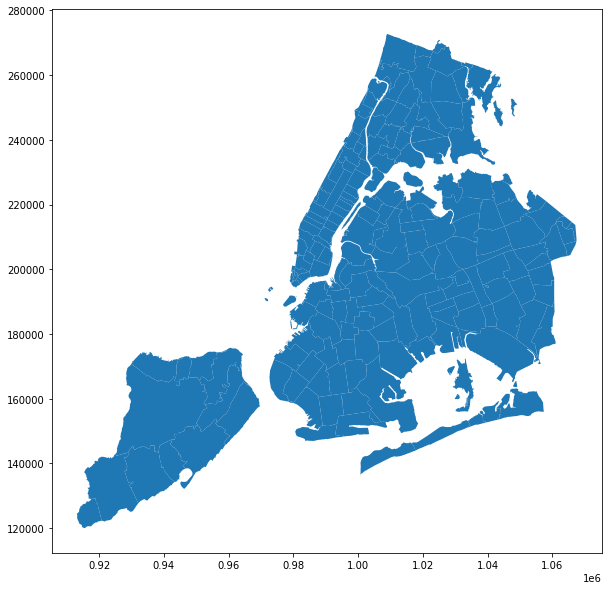

In [178]:
zipcode.plot(figsize=(10,10),aspect='equal')


In [179]:
zipcode['ZIPCODE'] = zipcode['ZIPCODE'].astype(int)
NYC_zipcode = zipcode['ZIPCODE'].unique()
NYC_zipcode

array([11436, 11213, 11212, 11225, 11218, 11226, 11219, 11210, 11230,
       11204, 10471, 10470, 10466, 10467, 10463, 10475, 10464, 10469,
       10468, 10458, 10034, 10033, 10462, 10040, 10453, 10465, 10461,
       10457, 10460, 10032, 10452, 10456, 10472, 10031, 10039, 10459,
       10451, 10473, 10030, 10027, 10474, 10455, 10037, 10024, 10454,
       10026, 10035, 10048, 10025, 11357, 10029,    83, 11356, 11359,
       11360, 11105, 10128, 10023, 11363, 10028, 11354, 11102, 11370,
       10021, 11358, 11362, 10044, 11369, 11103, 11106, 11368, 11377,
       11355, 11101, 11364, 10018, 10020, 11005, 10017, 10001, 10011,
       10016, 11104, 11109, 10010, 11367, 10014, 10003, 11222, 10002,
       11378, 10009, 10012, 10013, 10007, 11237, 11385, 10038, 11206,
       10006, 11412, 10005, 11251, 10004, 11411, 11201, 11205, 11208,
       11207, 11413, 11217, 11238, 11231, 11422, 11420, 11417, 11215,
       11232, 11430, 11203, 11239, 11236, 11220, 10301, 10303, 11234,
       10302, 11693,

In [180]:
complaints.rename(columns={'Incident Zip':'Zip'}, inplace=True)

In [181]:
complaints

,Unique Key,CrDate,ClDate,Agency,Agency Name,Complaint Type,Descriptor,Zip,City,Status,...,Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Date,Month,Year,DOW,Hour
4,52774941,2021-12-10 20:08:00,2021-12-13,DOB,Department of Buildings,Emergency Response Team (ERT),After Hours Work - Illegal,10065.0,NEW YORK,Closed,...,"217,537",MANHATTAN,40.763760,-73.964031,"(40.76375963167554, -73.96403091090507)",2021-12-13,12.0,2021.0,0.0,0.0
8,52776266,2021-12-12 10:04:00,2021-12-20,DOB,Department of Buildings,General Construction/Plumbing,Building Permit - None,10469.0,BRONX,Closed,...,"255,584",BRONX,40.868097,-73.850916,"(40.86809728159516, -73.85091557701605)",2021-12-20,12.0,2021.0,0.0,0.0
37,24776822,2013-01-12 22:01:00,2018-02-05,DOB,Department of Buildings,Building/Use,Illegal. Commercial Use In Resident Zone,11419.0,South Richmond Hill,Closed,...,"191,235",QUEENS,40.691419,-73.811735,"(40.69141867904986, -73.81173483504065)",2018-02-05,2.0,2018.0,0.0,0.0
47,52790054,2021-12-13 13:58:00,2021-12-27,DOB,Department of Buildings,Building/Use,SRO - Illegal Work/No Permit/Change In Occupan...,10454.0,BRONX,Closed,...,"234,657",BRONX,40.810728,-73.920743,"(40.81072782153203, -73.920742793466)",2021-12-27,12.0,2021.0,0.0,0.0
48,52790051,2021-12-13 01:30:00,2021-12-14,DOB,Department of Buildings,Boilers,Boiler - Defective/Inoperative/No Permit,10467.0,BRONX,Closed,...,"252,092",BRONX,40.858532,-73.866572,"(40.85853195212044, -73.86657212388833)",2021-12-14,12.0,2021.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33191,26922120,2013-12-20 12:01:00,2018-04-26,DOB,Department of Buildings,Building/Use,Illegal. Commercial Use In Resident Zone,11422.0,Rosedale,Closed,...,"184,587",QUEENS,40.673016,-73.733172,"(40.673016009111016, -73.73317243432652)",2018-04-26,4.0,2018.0,3.0,0.0
33216,26923003,2013-12-20 11:28:00,2018-04-18,DOB,Department of Buildings,Plumbing,Failure To Retain Water/Improper Drainage- (LL...,11419.0,South Richmond Hill,Closed,...,"191,094",QUEENS,40.691061,-73.830332,"(40.69106058644963, -73.83033186448709)",2018-04-18,4.0,2018.0,2.0,0.0
33245,26923794,2013-12-20 11:27:00,2018-04-18,DOB,Department of Buildings,Plumbing,Failure To Retain Water/Improper Drainage- (LL...,11419.0,South Richmond Hill,Closed,...,"191,094",QUEENS,40.691061,-73.830332,"(40.69106058644963, -73.83033186448709)",2018-04-18,4.0,2018.0,2.0,0.0
33255,26924558,2013-12-20 10:27:00,2018-04-28,DOB,Department of Buildings,Plumbing,Failure To Retain Water/Improper Drainage- (LL...,11411.0,Cambria Heights,Closed,...,"193,529",QUEENS,40.697568,-73.736839,"(40.69756831129841, -73.73683918668023)",2018-04-28,4.0,2018.0,5.0,0.0


In [182]:
comp = complaints.groupby(['Zip', 'Borough'])[['Complaint Type', 'BBL']].count()

In [183]:
comp.rename(columns={'Complaint Type':'Complaints'}, inplace=True)

In [184]:
comp

,,Complaints,BBL
Zip,Borough,,
10001.0,MANHATTAN,1,1
10002.0,MANHATTAN,4,4
10003.0,MANHATTAN,9,9
10005.0,MANHATTAN,1,1
10006.0,MANHATTAN,1,0
...,...,...,...
11434.0,QUEENS,13,13
11435.0,QUEENS,12,12
11436.0,QUEENS,11,10


In [185]:
comp = comp.reset_index()

In [186]:
comp

,Zip,Borough,Complaints,BBL
0,10001.0,MANHATTAN,1,1
1,10002.0,MANHATTAN,4,4
2,10003.0,MANHATTAN,9,9
3,10005.0,MANHATTAN,1,1
4,10006.0,MANHATTAN,1,0
...,...,...,...,...
158,11434.0,QUEENS,13,13
159,11435.0,QUEENS,12,12
160,11436.0,QUEENS,11,10
161,11692.0,QUEENS,3,3


In [197]:
tp = comp

In [198]:
tp

,Zip,Borough,Complaints,BBL
0,10001.0,MANHATTAN,1,1
1,10002.0,MANHATTAN,4,4
2,10003.0,MANHATTAN,9,9
3,10005.0,MANHATTAN,1,1
4,10006.0,MANHATTAN,1,0
...,...,...,...,...
158,11434.0,QUEENS,13,13
159,11435.0,QUEENS,12,12
160,11436.0,QUEENS,11,10
161,11692.0,QUEENS,3,3


In [199]:
tp.Zip = tp.Zip.astype(str)

In [200]:
tp

,Zip,Borough,Complaints,BBL
0,10001.0,MANHATTAN,1,1
1,10002.0,MANHATTAN,4,4
2,10003.0,MANHATTAN,9,9
3,10005.0,MANHATTAN,1,1
4,10006.0,MANHATTAN,1,0
...,...,...,...,...
158,11434.0,QUEENS,13,13
159,11435.0,QUEENS,12,12
160,11436.0,QUEENS,11,10
161,11692.0,QUEENS,3,3


(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  59.,  60.,  61.,  62.,  63.,  64.,
         65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
         76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
         87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,
         98.,  99., 100., 101., 102., 103., 104., 105., 106., 107., 108.,
        109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119.,
        120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130.,
        131., 132., 133., 134., 135., 136., 137., 138., 139., 140., 141.,
        142., 143., 144., 145., 146., 

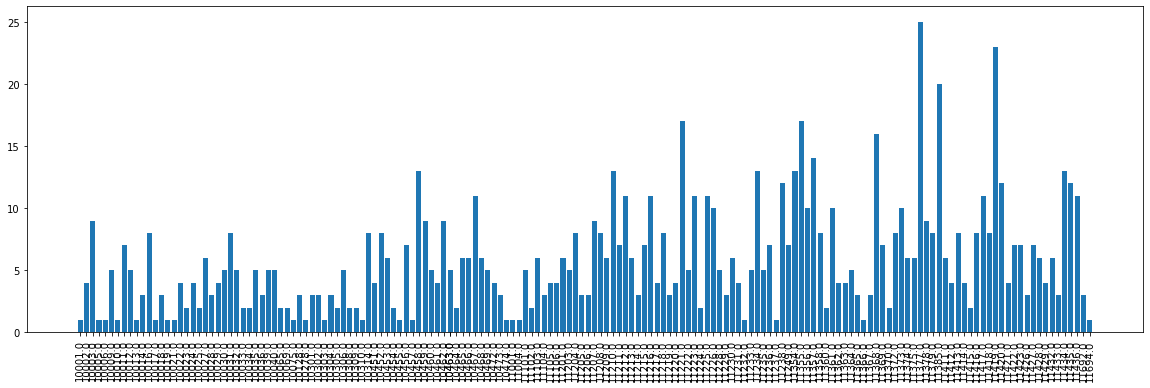

In [203]:
plt.figure(figsize=(20, 6))

plt.bar(tp.Zip, tp.Complaints)
plt.xticks(tp.Zip)
plt.xticks(rotation=90)

([<matplotlib.axis.XTick at 0x7f8f7d6f6220>,
 <a list of 163 Text major ticklabel objects>)

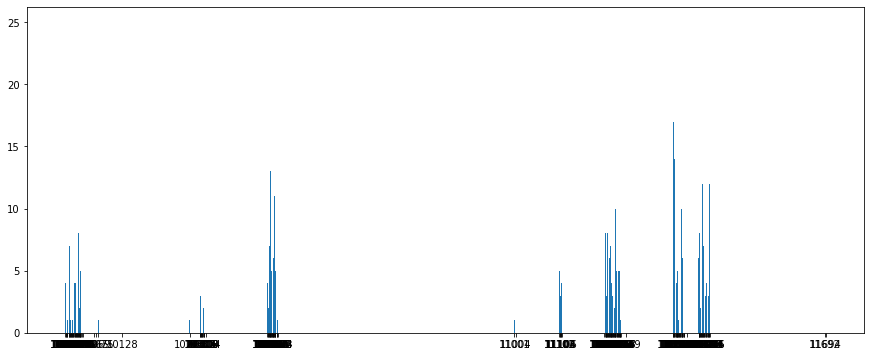

In [196]:
plt.figure(figsize=(15, 6))

plt.bar(comp.Zip, comp.Complaints)
plt.xticks(comp.Zip)


In [211]:
comp.Zip = comp.Zip.astype(float)

In [212]:
zipcode.ZIPCODE = zipcode.ZIPCODE.astype(float)

In [213]:
spatial = zipcode.merge(comp, left_on='ZIPCODE', right_on='Zip')

In [214]:
spatial

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,Zip,Borough,Complaints,BBL
0,11436.0,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",11436.0,QUEENS,11,10
1,11213.0,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",11213.0,BROOKLYN,6,6
2,11212.0,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",11212.0,BROOKLYN,11,11
3,11225.0,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",11225.0,BROOKLYN,11,11
4,11218.0,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",11218.0,BROOKLYN,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,11361.0,0,Bayside,28496.0,5.016352e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1048944.167 222063.575, 1048950.337 ...",11361.0,QUEENS,10,10
166,10036.0,0,New York,23543.0,1.139511e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((989419.213 215672.088, 989967.295 21...",10036.0,MANHATTAN,3,3
167,11414.0,0,Howard Beach,26148.0,6.392882e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1025670.681 184011.380, 1025872.813 ...",11414.0,QUEENS,4,3
168,10310.0,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17...",10310.0,STATEN ISLAND,1,1


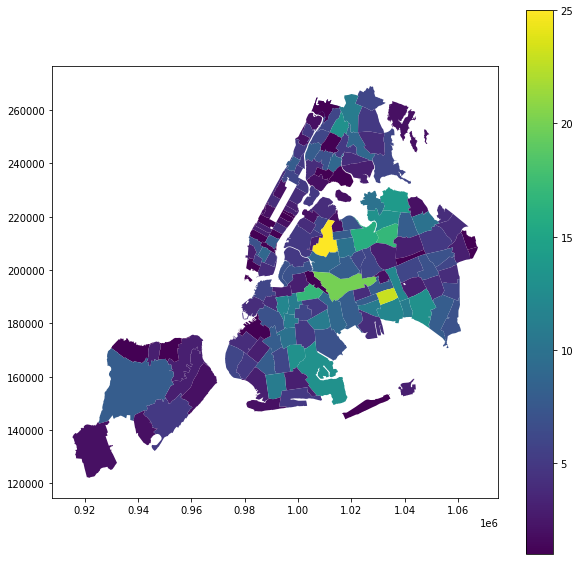

In [215]:
spatial.plot(figsize=(10,10), column='Complaints', legend=True)